#### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e.

In [1]:
!pip install imblearn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!pip install python-weka-wrapper3

     |████████████████████████████████| 12.9 MB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 58.8 MB/s 
  Created wheel for python-weka-wrapper3: filename=python_weka_wrapper3-0.2.3-py3-none-any.whl size=11540516 sha256=9b6e9ca8d0e28e45f8b249c7dcd964465c7631c1d82b220cc5567fb5368cd9f8
  Stored in directory: /root/.cache/pip/wheels/95/b9/7e/ea917497d6769b8b5a025c7509ef7f1c4e4da4d53621aef3e6
  Created wheel for javabridge: filename=javabridge-1.0.19-cp37-cp37m-linux_x86_64.whl size=1636666 sha256=a20bc52bf14d090087233556969ca63df70f97a9f619779d8d87d1bf07ffbbb8
  Stored in directory: /root/.cache/pip/wheels/8b/5e/7f/e1dd610613dcde4a4ed2974b4208ba90247a2dfc9add216c59
Successfully built python-weka-wrapper3 javabridge


In [13]:
import weka.core.jvm as jvm
import javabridge
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.7/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [24]:
import pandas as pd
weka_train = pd.read_csv('/content/drive/MyDrive/HW4/Data/weka_train.csv')
weka_test = pd.read_csv('/content/drive/MyDrive/HW4/Data/weka_test.csv')


In [28]:
traindata.to_csv('/content/drive/MyDrive/HW4/Data/smote_train.csv', index=False)
validdata.to_csv('/content/drive/MyDrive/HW4/Data/smote_valid.csv', index=False)
traindata = pd.read_csv('/content/drive/MyDrive/HW4/Data/smote_train.csv')
validdata = pd.read_csv('/content/drive/MyDrive/HW4/Data/smote_valid.csv')
traindata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,0.1
0,7.669800e+04,0.931768,2.130706e+09,280.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000e+00,3.725000e+04,1.432864e+06,3.664156e+06,1.007684e+06,25896.000000,0.000000,2.551696e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.933296e+06,3.655166e+06,1.766008e+06,1.132040e+06,0.000000,0.0,0.000000,0.0,1012.000000,268.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.690140e+05,4.239660e+06,7.033000e+05,...,5.330690e+06,4732.000000,1126.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,62282.000000,8.590800e+04,32790.000000,0.000000e+00,0.000000e+00,2.027100e+05,37928.000000,1.474558e+07,1.876644e+06,0.000000e+00,0.000000,0.000000,0.000000,2.801180e+06,2445.800000,2712.000000,9.658660e+05,1.706908e+06,1.240520e+06,4.933840e+05,7.210440e+05,4.697920e+05,3.391560e+05,1.579560e+05,7.322400e+04,0.000000,0.000000,0.000000,neg
1,4.104000e+04,0.704131,2.280000e+02,100.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000e+00,1.648000e+03,3.705920e+05,1.883374e+06,2.929360e+05,12016.000000,0.000000,1.234132e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.371990e+06,2.173634e+06,3.007960e+05,1.536980e+05,0.000000,0.0,0.000000,0.0,358.000000,110.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.704560e+05,2.397980e+05,...,2.341048e+06,1494.000000,152.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,13876.000000,3.818200e+04,8138.000000,0.000000e+00,0.000000e+00,6.577200e+04,10534.000000,3.002400e+05,4.802800e+04,0.000000e+00,0.000000,0.000000,0.000000,1.040120e+06,1018.640000,1020.000000,2.620320e+05,4.533780e+05,2.773780e+05,1.598120e+05,4.239920e+05,4.095640e+05,3.207460e+05,1.580220e+05,9.512800e+04,514.000000,0.000000,0.000000,neg
2,1.200000e+01,0.000000,7.000000e+01,66.000000,0.000000,10.00000,0.0,0.000000,0.000000,3.180000e+02,2.212000e+03,3.232000e+03,1.872000e+03,0.000000e+00,0.000000,0.000000,2.668000e+03,0.000000,0.000000,0.000000,6.420000e+02,3.894000e+03,1.018400e+04,7.554000e+03,1.076400e+04,1.014000e+03,0.000000,0.0,0.000000,0.0,60.000000,6.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.038000e+03,...,2.578000e+03,76.000000,62.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,232.000000,0.000000e+00,0.000000,2.014000e+03,3.700000e+02,4.800000e+01,18.000000,1.574000e+04,1.822000e+03,2.017400e+04,44.000000,0.000000,0.000000,0.000000e+00,1.080000,54.000000,5.670000e+03,1.566000e+03,2.400000e+02,4.600000e+01,5.800000e+01,4.400000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,4.000000,32.000000,neg
3,6.087400e+04,0.780256,1.368000e+03,458.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000e+00,4.375200e+04,1.966618e+06,1.800340e+06,1.316460e+05,4588.000000,0.000000,1.974038e+06,0.000000,226.000000,0.000000,0.000000e+00,0.000000e+00,3.230626e+06,2.618878e+06,1.058136e+06,5.510220e+05,0.000000,0.0,0.000000,0.0,1788.000000,642.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.212400e+04,3.722360e+05,2.128914e+06,8.195960e+05,...,3.590004e+06,2026.000000,444.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,44946.000000,6.264800e+04,11506.000000,0.000000e+00,0.000000e+00,1.494740e+05,35154.000000,4.570400e+05,8.048200e+04,9.833400e+04,27588.000000,0.000000,0.000000,2.117305e+07,1116.060000,1176.000000,4.047400e+05,9.042300e+05,6.220120e+05,2.297900e+05,4.052980e+05,3.471880e+05,2.869540e+05,3.115600e+05,4.339540e+05,1218.000000,0.000000,0.000000,neg
4,3.831200e+04,0.718950,2.130706e+09,218.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000e+00,9.128000e+03,7.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from weka.core.converters import Loader
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
# SMOTE the dataset and select the model using 5 fold cross validation
cv = KFold(n_splits=5, random_state=5, shuffle=True)
X_train = weka_train.iloc[:, :-1]
y_train = weka_train.loc[:,"class"]

error = []
for train, valid in cv.split(X_train, y_train):
    train_X = X_train.iloc[train, :]
    train_Y = y_train.iloc[train]

    valid_X = X_train.iloc[valid, :]
    valid_Y = y_train.iloc[valid]
    
    smote = SMOTE(random_state=5)
    train_X_s, train_y_s = smote.fit_resample(train_X, train_Y)
    
    train_X_s = pd.DataFrame(train_X_s)
    train_y_s = pd.DataFrame(train_y_s)
    traindata = pd.concat([train_X_s, train_y_s], axis=1)
    validdata = pd.concat([valid_X, valid_Y], axis=1)

    
    #traindata.to_csv('/content/drive/MyDrive/HW4/Data/smote_train.csv', index=False)
    #validdata.to_csv('/content/drive/MyDrive/HW4/Data/smote_valid.csv', index=False)
    weka_loader = Loader(classname='weka.core.converters.CSVLoader')
    smote_train = weka_loader.load_file('/content/drive/MyDrive/HW4/Data/smote_train.csv')
    smote_valid = weka_loader.load_file('/content/drive/MyDrive/HW4/Data/smote_valid.csv')
    
    smote_train.class_is_last()
    smote_valid.class_is_last()
    
    lmt_model = Classifier(classname='weka.classifiers.trees.LMT')
    lmt_model.build_classifier(smote_train)
    evl = Evaluation(smote_train)
    evl.test_model(lmt_model, smote_valid)
    
    error.append(evl.percent_correct)

fold = [i for i in range(1,6)]
df_cv_error = pd.DataFrame({'cv fold':fold,
                           'cv error': [(100-i) for i in error]})
df_cv_error

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
# build a lmt tree model using SMOTE dataset
smote = SMOTE(random_state=5)
train_X_s, train_y_s = smote.fit_resample(X_train, y_train)
    
traindata = pd.concat([train_X_s, train_y_s], axis=1)
    
traindata.to_csv('/content/drive/MyDrive/HW4/Data/smote_train_all.csv', index=False)

weka_train = weka_loader.load_file('/content/drive/MyDrive/HW4/Data/smote_train_all.csv')
weka_train.class_is_last()

lmt_model.build_classifier(weka_train)

weka_train_pred = []
weka_train_prob = []
for i in weka_train:
    weka_train_pred.append(lmt_model.classify_instance(i))
    weka_train_prob.append(lmt_model.distribution_for_instance(i))

weka_train_pred = np.array(weka_train_pred).astype('str')
weka_train_pred[weka_train_pred == '0.0'] = 'neg'
weka_train_pred[weka_train_pred == '1.0'] = 'pos'
weka_train_prob = np.array(weka_train_prob)

In [ ]:
print("=======Confusion Matrix for Training Dataset========")
print(confusion_matrix(train_y_s, weka_train_pred))

=======Confusion Matrix for Training Dataset========
[[58171   829]
 [  428 58572]]


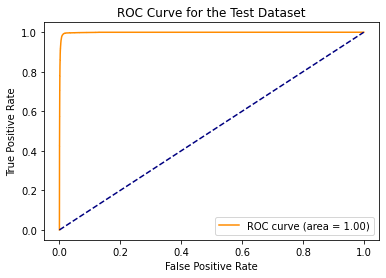

In [ ]:
# Calculate the ROC curve and the AUC for the test dataset
fpr, tpr, thresholds = roc_curve(train_y_s, weka_train_prob[:, 1], pos_label='pos')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Test Dataset')
plt.legend(loc="lower right")
plt.show()

In [ ]:
weka_test_pred = []
weka_test_prob = []
for i in weka_test:
    weka_test_pred.append(lmt_model.classify_instance(i))
    weka_test_prob.append(lmt_model.distribution_for_instance(i))

weka_test_pred = np.array(weka_test_pred).astype('str')
weka_test_pred[weka_test_pred == '0.0'] = 'neg'
weka_test_pred[weka_test_pred == '1.0'] = 'pos'
weka_test_prob = np.array(weka_test_prob)

In [ ]:
print("=======Confusion Matrix for Training Dataset========")
print(confusion_matrix(test_data.loc[:,"class"], weka_test_pred))

=======Confusion Matrix for Training Dataset========
[[15248   377]
 [   55   320]]


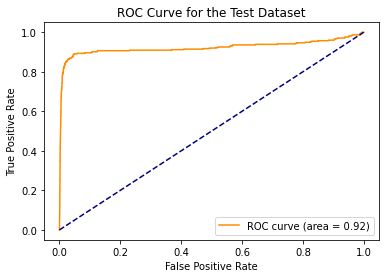

In [ ]:
# Calculate the ROC curve and the AUC for the test dataset
fpr, tpr, thresholds = roc_curve(test_data.loc[:,"class"], weka_test_prob[:, 1], pos_label='pos')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Test Dataset')
plt.legend(loc="lower right")
plt.show()